In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [150]:
Default = pd.read_excel(r"C:\Users\Muthu B\Downloads\Company_Data2015-1.xlsx")

#Glimpse of Data
Default.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBITM,PBDTM,CPM,APATM,Debtors_Velocity,Creditors_Velocity,Inventory_Velocity,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block,Default
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,21214,Tata_Tele._Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,14852,ABG_Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,23505,Bharati_Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


# First, let us check the number of rows (observations) and the number of columns (variables).

In [3]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 68


# Data types of all variables

In [4]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [5]:
Default.duplicated().sum()

0

No Duplicate Values in the Dataset

In [151]:
Default.drop('Co_Code', axis = 1, inplace = True)

In [152]:
Default.drop('Co_Name', axis = 1, inplace = True)

Insignificant variables for modelling are dropped

# Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [9]:
Default.describe()

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,Default
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000,3586.000000
mean,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,1778.453751,...,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548,0.108199
std,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,11437.574690,...,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352,0.310674
min,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,-4.510000,...,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000,0.000000
25%,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,10.555000,...,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000,0.000000
50%,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,52.010000,...,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000,0.000000
75%,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,310.540000,...,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000,0.000000
max,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,254737.220000,...,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000,1.000000


## Now, let us check the basic measures of descriptive statistics for the categorical variables

In [10]:
Default["Default"].value_counts()

0    3198
1     388
Name: Default, dtype: int64

# Checking proportion of default

In [11]:
Default.Default.sum() / len(Default.Default)

0.10819854991634133

## Check for missing values

In [14]:
Default.isnull().sum().sort_values(ascending=False).head(20)

Inventory Velocity (Days)             103
Book Value (Adj.) (Unit Curr)           4
PBITM (%)[Latest]                       1
Current Ratio[Latest]                   1
Fixed Assets Ratio[Latest]              1
Inventory Ratio[Latest]                 1
Debtors Ratio[Latest]                   1
Interest Cover Ratio[Latest]            1
PBIDTM (%)[Latest]                      1
Total Asset Turnover Ratio[Latest]      1
PBDTM (%)[Latest]                       1
CPM (%)[Latest]                         1
APATM (%)[Latest]                       1
Value Of Output                         0
CP                                      0
Revenue earnings in forex               0
Revenue expenses in forex               0
Adjusted PAT                            0
PAT                                     0
PBT                                     0
dtype: int64

From the above, we can see 13 columns have missing values.
Column "Inventory Velocity (Days)" has the highest count of missing values with 103, "Book Value (Adj.) (Unit Curr)"
with 4 values missing and the rest 11 columns with just 1 value missing.

In [153]:
Default.fillna(Default.mean(), inplace=True)

In [154]:
Default.isnull().sum().sort_values(ascending=False).head(30)

Default                                0
PBIDT                                  0
Cash_Flow_From_Operating_Activities    0
CEPS                                   0
Market_Capitalisation                  0
Book_Value.1                           0
Book_Value                             0
Capital_expenses_in_forex              0
Revenue_expenses_in_forex              0
Revenue_earnings_in_forex              0
CP                                     0
Adjusted_PAT                           0
PAT                                    0
PBT                                    0
PBIT                                   0
PBDT                                   0
Selling_Cost                           0
Value_of_Output/Gross_Block            0
Cost_of_Production                     0
Value_Of_Output                        0
Other_Income                           0
Net_Sales                              0
Gross_Sales                            0
Total_Assets/Liabilities_              0
Current_Liabilit

Mean imputation has been done to treat the missing values. In the place of the missing values, we have imputed the mean of the variable

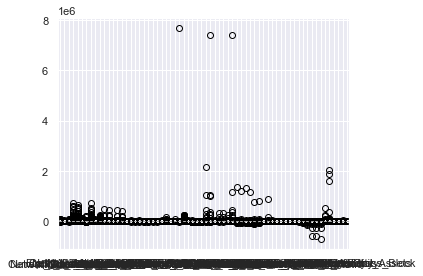

In [157]:
Default.boxplot()
plt.tight_layout()
plt.show()

In [158]:
Default_X = Default.drop('Default', axis = 1)
Default_Y = Default['Default']

In [159]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [160]:
for column in Default_X.columns:
    lr,ur=remove_outlier(Default[column])
    Default_X[column]=np.where(Default_X[column]>ur,ur,Default_X[column])
    Default_X[column]=np.where(Default_X[column]<lr,lr,Default_X[column])

In [161]:
Default = pd.concat([Default_X, Default_Y], axis = 1)

## Correlation heatmap

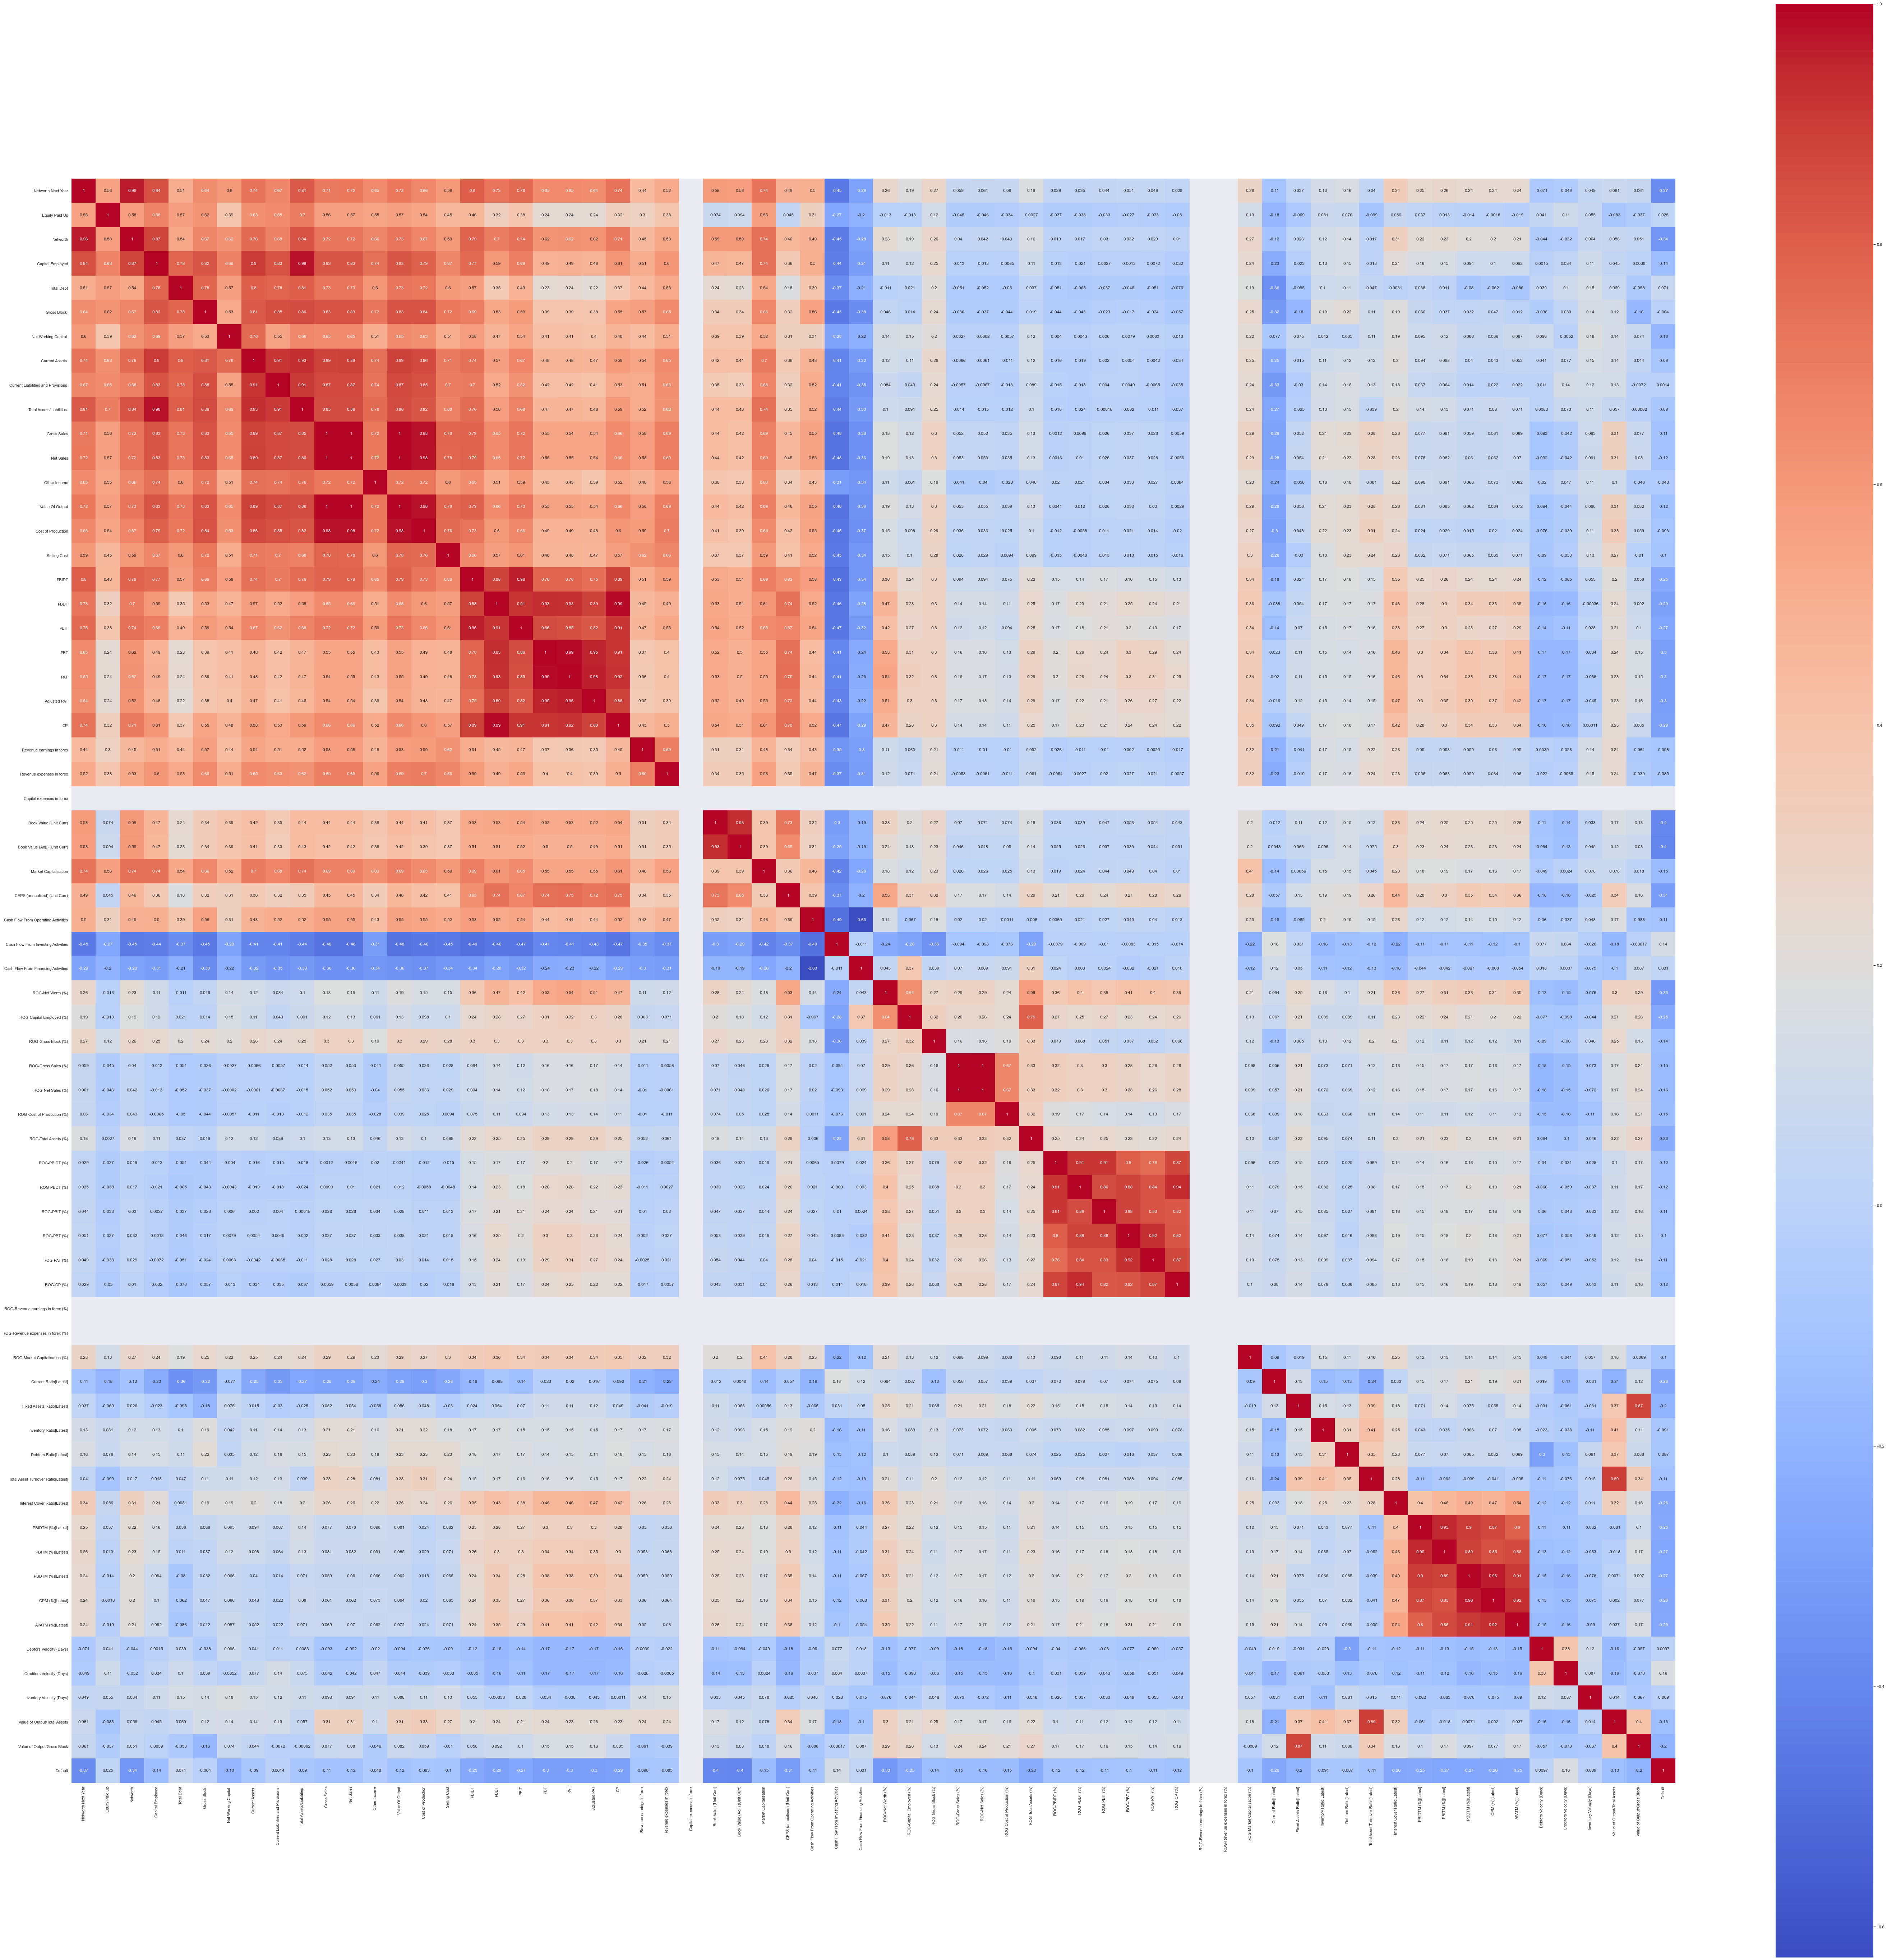

In [69]:
plt.figure(figsize=(100,100)) 
p=sns.heatmap(Default.corr(), annot=True,cmap='coolwarm',square=True)

Variables [[Networth Next Year,	Equity Paid Up,	Networth,	Capital Employed,	Total Debt,	Gross Block, 	Net Working Capital, 	Current Assets, 	Current Liabilities and Provisions, 	Total Assets/Liabilities, 	Gross Sales,	Net Sales,	Other Income,	Value Of Output,	Cost of Production,	Selling Cost,	PBIDT,	PBDT,	PBIT,	PBT,	PAT,	Adjusted PAT,	CP,	Revenue earnings in forex,	Revenue expenses in forex,	Capital expenses in forex,	Book Value (Unit Curr),	Book Value (Adj.) (Unit Curr),	Market Capitalisation,	CEPS (annualised) (Unit Curr)]] seem to be highly correlated among one another


Variables [[Total Asset Turnover Ratio[Latest],	Interest Cover Ratio[Latest],	PBIDTM (%)[Latest],	PBITM (%)[Latest],	PBDTM (%)[Latest],	CPM (%)[Latest],	APATM (%)[Latest]]] seem to be highly correlated among one another


Variables [[ROG-Cost of Production (%),	ROG-Total Assets (%),	ROG-PBIDT (%),	ROG-PBDT (%),	ROG-PBIT (%),	ROG-PBT (%)]] also seem to be highly correlated among one another

## Univariate Analysis

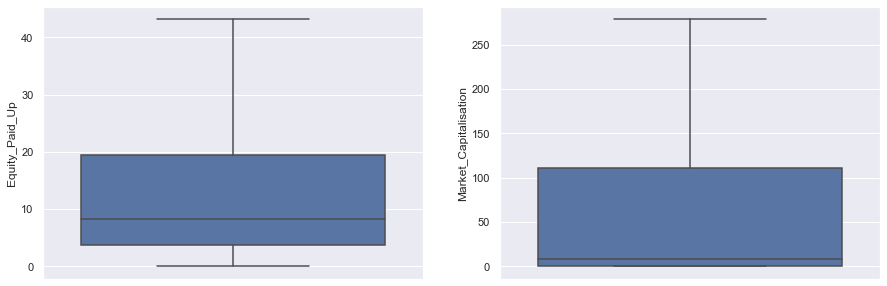

In [197]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = Default['Equity_Paid_Up'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['Market_Capitalisation'])
plt.show()

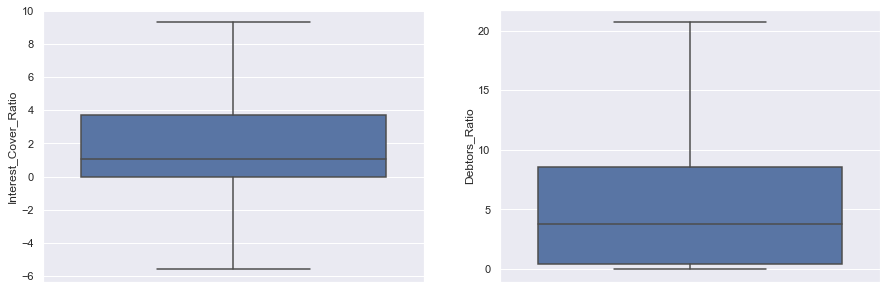

In [198]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = Default['Interest_Cover_Ratio'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['Debtors_Ratio'])
plt.show()

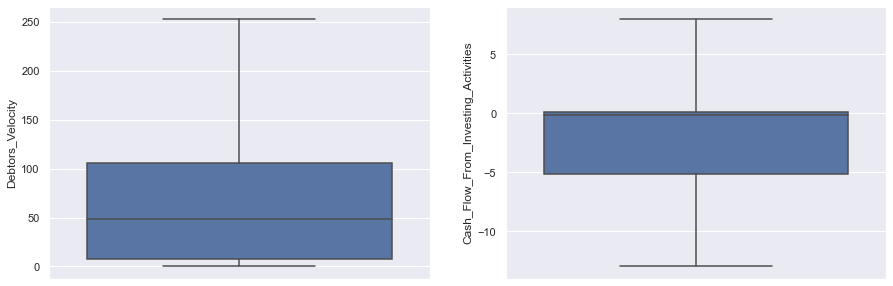

In [199]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = Default['Debtors_Velocity'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['Cash_Flow_From_Investing_Activities'])
plt.show()

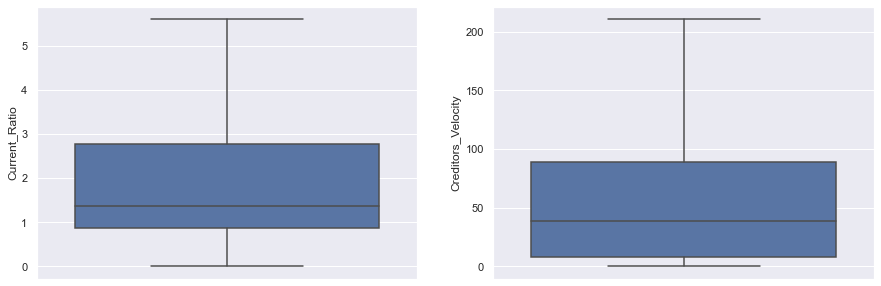

In [200]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = Default['Current_Ratio'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['Creditors_Velocity'])
plt.show()

### Bivariate Analysis: Default Vs. other variables

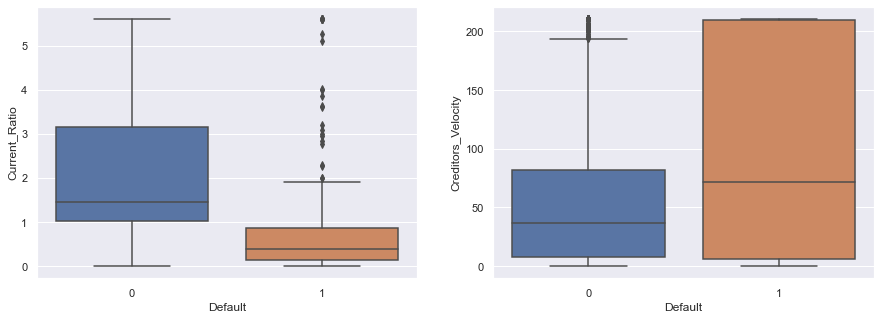

In [203]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Default['Default'], Default['Current_Ratio'])

plt.subplot(1,2,2)
sns.boxplot(Default['Default'], Default['Creditors_Velocity'])
plt.show()

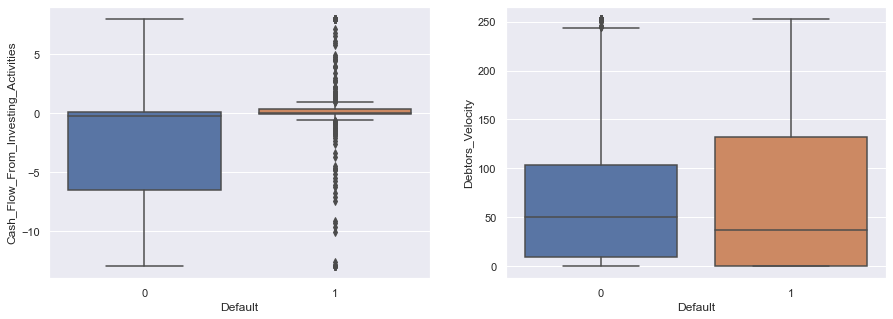

In [204]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Default['Default'], Default['Cash_Flow_From_Investing_Activities'])

plt.subplot(1,2,2)
sns.boxplot(Default['Default'], Default['Debtors_Velocity'])
plt.show()

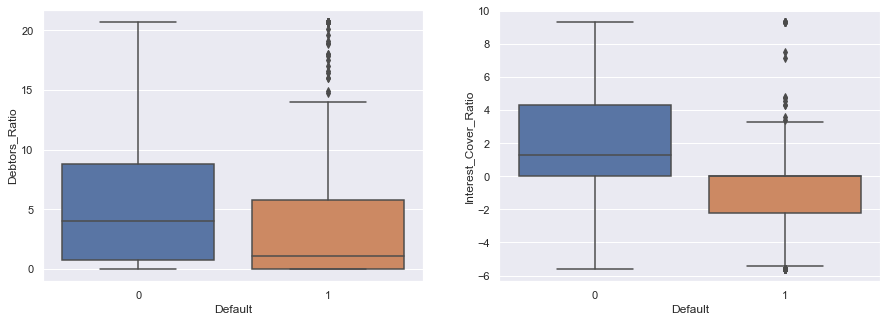

In [205]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Default['Default'], Default['Debtors_Ratio'])

plt.subplot(1,2,2)
sns.boxplot(Default['Default'], Default['Interest_Cover_Ratio'])
plt.show()

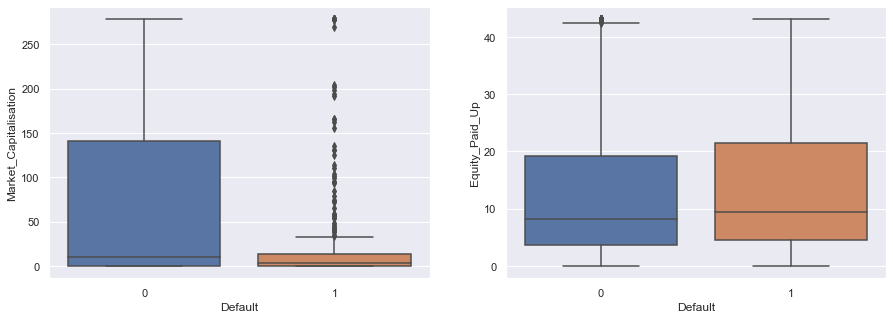

In [206]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Default['Default'], Default['Market_Capitalisation'])

plt.subplot(1,2,2)
sns.boxplot(Default['Default'], Default['Equity_Paid_Up'])
plt.show()

# Model Building using Logistic Regression for 'Probability at default' 

## Importing statsmodels modules


## Creating logistic regression equation & storing it in f_1 

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’ data = ‘Data Frame containing the required values’).fit()

In [70]:
import statsmodels.formula.api as SM

In [162]:
Default.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets/Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value',
       'Book_Value.1', 'Market_Capitalisation', 'CEPS',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth',
       'ROG-Capital_Employed', 'ROG_Gross_Block', 'ROG-Gross_Sales',
       'ROG-Net_Sales', 'ROG-Cost_of_Production', 'ROG-Total_Assets',
       'ROG-PBIDT', 'ROG-PBDT', 'ROG-PBIT', 'ROG-PBT', 'ROG-PAT', 'ROG-CP',
       'ROG-Revenue_earnings_in_forex', 'ROG-Reve

In [90]:
from sklearn.model_selection import train_test_split

In [163]:
X = Default.drop('Default', axis = 1)
y = Default['Default']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [166]:
calc_vif(X).sort_values(by = 'VIF', ascending = True).head(25)

,variables,VIF
35,ROG_Gross_Block,1.582368
48,ROG-Market_Capitalisation,1.672778
62,Inventory_Velocity,1.963556
38,ROG-Cost_of_Production,2.039047
61,Creditors_Velocity,2.325174
51,Inventory_Ratio,2.385908
49,Current_Ratio,2.407827
31,Cash_Flow_From_Investing_Activities,2.484407
60,Debtors_Velocity,2.488317
52,Debtors_Ratio,2.539871


We have identified the most important variables to build our model

In [167]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [169]:
model = SM.logit(formula = 'Default ~ Inventory_Velocity + Creditors_Velocity + Inventory_Ratio + Current_Ratio + Cash_Flow_From_Investing_Activities + Debtors_Velocity + Debtors_Ratio + Interest_Cover_Ratio + Cash_Flow_From_Financing_Activities + Revenue_earnings_in_forex + Cash_Flow_From_Operating_Activities + Revenue_expenses_in_forex + Other_Income + Market_Capitalisation + Selling_Cost + Equity_Paid_Up', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.223613
         Iterations 9


In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                  0.3213
Time:                        19:46:07   Log-Likelihood:                -537.12
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                 5.471e-98
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6142      0.187     -3.277      0.001      -0.982      -0.247
Inventory_Velocity                     -0.0002      0.001     -0.151      0.880      -0.002       0.002
Creditors_Velocity                      0.0052      0.001      4.627      0.000       0.003       0.007
Inventory_Ratio                        -0.0062      0.012     -0.504      0.614      -0.030       0.018
Current_Ratio                          -0.9209      0.100     -9.170      0.000      -1.118      -0.724
Cash_Flow_From_Investing_Activities     0.0616      0.021      2.897      0.004       0.020       0.103
Debtors_Velocity                       -0.0029      0.001     -2.784      0.005      -0.005      -0.001
Debtors_Ratio                          -0.0408      0.015     -2.766      0.006      -0.070      -0.012
Interest_Cover_Ratio                   -0.2165      0.028     -7.686      0.000      -0.272      -0.161
Cash_Flow_From_Financing_Activities     0.0038      0.018      0.209      0.834      -0.032       0.039
Revenue_earnings_in_forex              -0.0158      0.017     -0.930      0.352      -0.049       0.018
Cash_Flow_From_Operating_Activities    -0.0114      0.010     -1.111      0.267      -0.031       0.009
Revenue_expenses_in_forex               0.0321      0.018      1.765      0.078      -0.004       0.068
Other_Income                            0.0461      0.033      1.410      0.158      -0.018       0.110
Market_Capitalisation                  -0.0095      0.002     -6.295      0.000      -0.013      -0.007
Selling_Cost                            0.0387      0.037      1.035      0.301      -0.035       0.112
Equity_Paid_Up                          0.0199      0.007      2.807      0.005       0.006       0.034
=======================================================================================================
"""

We can see a bunch of Insignificant variables, therefore we'll eliminate them all 

# Model 2

In [171]:
model_2 = SM.logit(formula = 'Default ~ Creditors_Velocity + Current_Ratio + Cash_Flow_From_Investing_Activities + Debtors_Velocity + Debtors_Ratio + Interest_Cover_Ratio + Revenue_expenses_in_forex + Market_Capitalisation + Equity_Paid_Up', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.225119
         Iterations 9


In [172]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                  0.3167
Time:                        19:50:57   Log-Likelihood:                -540.73
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.156e-102
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6344      0.183     -3.468      0.001      -0.993      -0.276
Creditors_Velocity                      0.0052      0.001      4.674      0.000       0.003       0.007
Current_Ratio                          -0.9213      0.100     -9.225      0.000      -1.117      -0.726
Cash_Flow_From_Investing_Activities     0.0693      0.017      4.192      0.000       0.037       0.102
Debtors_Velocity                       -0.0031      0.001     -3.071      0.002      -0.005      -0.001
Debtors_Ratio                          -0.0395      0.014     -2.912      0.004      -0.066      -0.013
Interest_Cover_Ratio                   -0.2171      0.028     -7.802      0.000      -0.272      -0.163
Revenue_expenses_in_forex               0.0291      0.015      1.952      0.051      -0.000       0.058
Market_Capitalisation                  -0.0087      0.001     -6.122      0.000      -0.011      -0.006
Equity_Paid_Up                          0.0227      0.007      3.332      0.001       0.009       0.036
=======================================================================================================
"""

Revenue_expenses_in_forex is still insignificant, so we'll eliminate it

# Model 3

In [173]:
model_3 = SM.logit(formula = 'Default ~ Creditors_Velocity + Current_Ratio + Cash_Flow_From_Investing_Activities + Debtors_Velocity + Debtors_Ratio + Interest_Cover_Ratio + Market_Capitalisation + Equity_Paid_Up', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.225892
         Iterations 9


In [174]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                  0.3143
Time:                        19:53:23   Log-Likelihood:                -542.59
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.417e-102
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6155      0.181     -3.398      0.001      -0.971      -0.260
Creditors_Velocity                      0.0051      0.001      4.625      0.000       0.003       0.007
Current_Ratio                          -0.9176      0.098     -9.354      0.000      -1.110      -0.725
Cash_Flow_From_Investing_Activities     0.0659      0.016      3.996      0.000       0.034       0.098
Debtors_Velocity                       -0.0030      0.001     -3.010      0.003      -0.005      -0.001
Debtors_Ratio                          -0.0365      0.013     -2.748      0.006      -0.062      -0.010
Interest_Cover_Ratio                   -0.2121      0.028     -7.686      0.000      -0.266      -0.158
Market_Capitalisation                  -0.0078      0.001     -5.872      0.000      -0.010      -0.005
Equity_Paid_Up                          0.0241      0.007      3.549      0.000       0.011       0.037
=======================================================================================================
"""

Now, all these remaining variables are significant as the P value is below the threshold 0.05

In [175]:
y_prob_pred_train = model_3.predict(Default_train)

In [176]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [177]:
from sklearn import metrics

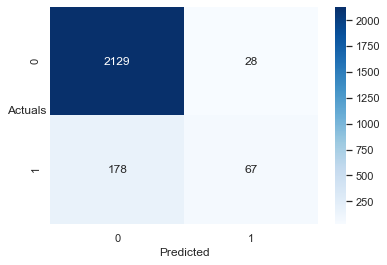

In [179]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [180]:
67/245

0.27346938775510204

In [181]:
67/95

0.7052631578947368

# Prediction on the Data

In [182]:
y_prob_pred_3 = model_3.predict()

## Choosing the optimal threshold

In [184]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [185]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.1593713219937719

### Validating on the train set with revised threshold

In [186]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

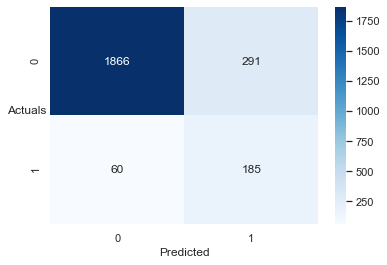

In [187]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [189]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.969     0.865     0.914      2157
           1      0.389     0.755     0.513       245

    accuracy                          0.854      2402
   macro avg      0.679     0.810     0.714      2402
weighted avg      0.910     0.854     0.873      2402



#### Validating on the test set

In [190]:
y_prob_pred_test = model_3.predict(Default_test)

In [191]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

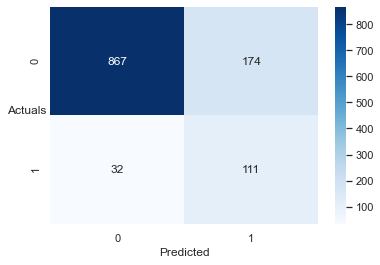

In [192]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [193]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.964     0.833     0.894      1041
           1      0.389     0.776     0.519       143

    accuracy                          0.826      1184
   macro avg      0.677     0.805     0.706      1184
weighted avg      0.895     0.826     0.849      1184

